[ССЫЛКА НА ДАШБОРД ](https://datalens.yandex/vhqq2doavkkwk)

# **Исследование показателей трудоустройств БФ "Всё получится!"**
_____
**Описание исследования.**
В ходе исследования нами будут рассмотрены данные за определённый перио о трудоустройствах благополучателей фона "Всё получится!" предоставленные нам самим фондом.
_____
**Цель исследования.**     

Провести анализ данных при помощи которых фонд сможет улучшить стратегию по трудоустройству благополучателей и дальнейшее сосздание дашборда для отслеживания фондом показателей.
_____
**Задачи исследования.**

1.Выяснить количество времени необходимое для трудоустройства благополучателем

2.Определить общее количество благополучателей в разбивке по происхождению, полу, возрасту и т.д.

3.Исследовать причины влияющие на отработку более 1 месяца кандидатом

4.Ознакомиться с показателями работы провайдеров

5.Предоставить рекомендации по усовершенствованию работы фонда на основе анализа предоставленных данных

**[Часть 1. ПРЕДОБРАБОТКА ДАННЫХ](#start)**

**[Часть 2. ОБЩИЙ ОБЗОР ДАННЫХ](#view)**

* [2.1. Проверка периода представленного в датасете](#period)

* [2.2. Изучение медианного времени от добавления в систему до трудоустройства](#median)

* [2.3. Изучение количества благополучателей в зависимости от основания сотрудничества с фондом](#base)

* [2.4. Графики количества благополучателей в зависимости от пола и возраста](#gender)

* [2.5. Итоги общего обзора данных](#first)

**[Часть 3. ИЗУЧЕНИЕ ОТРАБОТАВШИХ БОЛЕЕ 1 МЕСЯЦА](#more)**

* [3.1 Отработавшие более 1 месяца в разрезе гендера](#gend)

* [3.2 Отработавшие более 1 месяца в разрезе возраста ](#age)

* [3.3 Отработавшие более 1 месяца в разрезе типа трудоустройства](#type)

* [3.4 Отработавшие более 1 месяца в разрезе типа опыта работы](#job)

* [3.5 Итоги изучения отработавших более 1 месяца](#second)

**[Часть 4. ИССЛЕДОВАНИЕ ТРУДОУСТРОЙСТВ В РАЗРЕЗЕ РАБОТЫ ПРОВАЙДЕРОВ] (#razrez)**

* [4.1 Общие трудоустройства провайдеров](#general)

* [4.2 Количество трудоустроенных провайдерами кандидатов по типу трудоустройства по типу опыта работы](#types)

* [4.3 Особенности работы крупнейших провайдеров](#espesial)

* [4.4 Динамика трудоустройств в разбивке по провайдерам](#dynamic)

* [4.5 Итоги исследования работы провайдеров](#provfin)

**[Часть 5. ИТОГОВЫЕ ВЫВОДЫ ИССЛЕДОВАНИЯ](#final)**

# **ЧАСТЬ 1 ПРЕДОБРАБОТКА ДАННЫХ**

<a name="start"></a>

In [ ]:
# загружаем необходимые библиотеки

import pandas as pd

from google.colab import files

from plotly import graph_objects as go

import seaborn as sns

import matplotlib.pyplot as plt

from datetime import datetime

import warnings

warnings.filterwarnings(action='ignore')

In [ ]:
#загружаем необходимые файлы для работы

uploaded = files.upload()

In [ ]:
# просматриваем часть датасета

successful_employees = pd.read_excel('/content/БФРауль_Данные_по_трудоустроенным.xls')

successful_employees.head()

,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,1+_месяц_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код
0,1,Женский,25,2018-12-06,True,ЛОЖЬ,ЛОЖЬ,2023-01-16,NaT,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
1,2,Мужской,28,2021-09-22,ИСТИНА,False,ЛОЖЬ,2023-01-09,NaT,ИСТИНА,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500
2,3,Женский,31,2016-07-08,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-04-18,2023-06-30,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
3,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2022-11-21,2022-12-30,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
4,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-22,2023-03-30,ЛОЖЬ,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500


In [ ]:
successful_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   id_кандидата                              259 non-null    int64         
 1   пол                                       259 non-null    object        
 2   возраст                                   259 non-null    int64         
 3   дата_добавления                           258 non-null    datetime64[ns]
 4   инвалидность                              259 non-null    object        
 5   сиротский_опыт                            259 non-null    object        
 6   адаптированная_образовательная_программа  259 non-null    object        
 7   начало_трудоустройства                    259 non-null    datetime64[ns]
 8   завершение_трудоустройства                85 non-null     datetime64[ns]
 9   1+_месяц_работы                 

**В данных присутствут пропуски и неточность в определении типов данных**

**Заменим значения столбца "1+_месяц_работы" на подходящее для функций значение**

In [ ]:
#проверяем

successful_employees.columns = ['id_кандидата', 'пол', 'возраст', 'дата_добавления','инвалидность','сиротский_опыт','адаптированная_образовательная_программа', 'начало_трудоустройства', 'завершение_трудоустройства', 'больше_месяца_работы', 'тип_площадки', 'тип_трудоустройства', 'тип_опыта_работы', 'регион_код', 'провайдер_код']

successful_employees.columns

Index(['id_кандидата', 'пол', 'возраст', 'дата_добавления', 'инвалидность',
       'сиротский_опыт', 'адаптированная_образовательная_программа',
       'начало_трудоустройства', 'завершение_трудоустройства',
       'больше_месяца_работы', 'тип_площадки', 'тип_трудоустройства',
       'тип_опыта_работы', 'регион_код', 'провайдер_код'],
      dtype='object')

**Для удобства в работе заменим текстовые значения на значения булева типа**

In [ ]:
successful_employees= successful_employees.replace('ИСТИНА', True)

successful_employees= successful_employees.replace('ЛОЖЬ', False)

successful_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   id_кандидата                              259 non-null    int64         
 1   пол                                       259 non-null    object        
 2   возраст                                   259 non-null    int64         
 3   дата_добавления                           258 non-null    datetime64[ns]
 4   инвалидность                              259 non-null    bool          
 5   сиротский_опыт                            259 non-null    bool          
 6   адаптированная_образовательная_программа  259 non-null    bool          
 7   начало_трудоустройства                    259 non-null    datetime64[ns]
 8   завершение_трудоустройства                85 non-null     datetime64[ns]
 9   больше_месяца_работы            

**Заменим немногочисленные пропуски в столбцах с данными не в виде дат на значения заглушки**

In [ ]:
successful_employees['тип_площадки']= successful_employees['тип_площадки'].fillna('Неизвестно')

successful_employees['тип_трудоустройства']= successful_employees['тип_трудоустройства'].fillna('Неизвестно')

successful_employees['тип_опыта_работы']= successful_employees['тип_опыта_работы'].fillna('Неизвестно')

successful_employees.head()

,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,больше_месяца_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код
0,1,Женский,25,2018-12-06,True,False,False,2023-01-16,NaT,True,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
1,2,Мужской,28,2021-09-22,True,False,False,2023-01-09,NaT,True,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500
2,3,Женский,31,2016-07-08,True,False,False,2023-04-18,2023-06-30,True,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
3,4,Мужской,34,2022-10-07,True,False,False,2022-11-21,2022-12-30,True,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
4,4,Мужской,34,2022-10-07,True,False,False,2023-03-22,2023-03-30,False,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500


In [ ]:
successful_employees.isna().sum()

id_кандидата                                  0
пол                                           0
возраст                                       0
дата_добавления                               1
инвалидность                                  0
сиротский_опыт                                0
адаптированная_образовательная_программа      0
начало_трудоустройства                        0
завершение_трудоустройства                  174
больше_месяца_работы                          0
тип_площадки                                  0
тип_трудоустройства                           0
тип_опыта_работы                              0
регион_код                                    0
провайдер_код                                 0
dtype: int64

**Пропуски остались только в стобцах с датами. Так как нам не важно время - значения для удобства сократим до даты, а при значении типа str метод datetime выдаёт ошибку.**

In [ ]:
successful_employees['дата_добавления'] =  pd.to_datetime(successful_employees['дата_добавления'], format='%Y-%m-%d')

successful_employees['завершение_трудоустройства'] =  pd.to_datetime(successful_employees['завершение_трудоустройства'], format='%Y-%m-%d')

successful_employees.head()

,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,больше_месяца_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код
0,1,Женский,25,2018-12-06,True,False,False,2023-01-16,NaT,True,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
1,2,Мужской,28,2021-09-22,True,False,False,2023-01-09,NaT,True,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500
2,3,Женский,31,2016-07-08,True,False,False,2023-04-18,2023-06-30,True,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
3,4,Мужской,34,2022-10-07,True,False,False,2022-11-21,2022-12-30,True,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
4,4,Мужской,34,2022-10-07,True,False,False,2023-03-22,2023-03-30,False,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500


**Проверим явные и неявные дубликаты в датасете**

In [ ]:
# поиск явных дубликатов

successful_employees.duplicated().sum()

0

**Неявные дубликаты представляется искать только там где совпадают следующие критерии:**

In [ ]:
#поиск неявных дубликатов

successful_employees.duplicated(subset=['id_кандидата','пол','возраст','дата_добавления','начало_трудоустройства']).sum()

0

**У заказчика была уточнена информация об ошибке в данных в указании в основаниях участия в программе у подопечного с id 62**

In [ ]:
#successful_employees.query('id_кандидата == 62')

successful_employees.loc[66, 'инвалидность'] = True

successful_employees.loc[66, 'адаптированная_образовательная_программа'] = True

successful_employees.query('id_кандидата == 62')

,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,больше_месяца_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код
65,62,Мужской,21,2018-05-16,True,False,True,2023-04-24,2023-06-30,True,Внешняя,Временное трудоустройство,Повторный,reg200,prov3500
66,62,Мужской,21,2018-05-16,True,False,True,2023-08-24,NaT,False,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500


**Также у заказчика было уточнено что у данного провайдера есть 5 человек со
сложной жизненной сиуацией не имеющих ни одного из трёх критериев и все они несовершеннолетние.**

In [ ]:
successful_employees.query('инвалидность == False & сиротский_опыт == False & адаптированная_образовательная_программа == False')

,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,больше_месяца_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код
210,198,Женский,16,2023-08-05,False,False,False,2023-08-06,NaT,True,Внешняя,Временное трудоустройство,Первый,reg204,prov3504
211,199,Мужской,14,2023-06-13,False,False,False,2023-08-01,NaT,True,Внутренняя,Временное трудоустройство,Первый,reg204,prov3504
213,201,Мужской,16,2023-06-13,False,False,False,2023-07-03,2023-07-31,False,Внешняя,Временное трудоустройство,Первый,reg204,prov3504
219,207,Женский,16,2023-06-27,False,False,False,2023-08-01,NaT,True,Внешняя,Временное трудоустройство,Первый,reg204,prov3504
220,208,Женский,14,2023-01-10,False,False,False,2023-08-01,NaT,True,Внутренняя,Временное трудоустройство,Первый,reg204,prov3504


In [ ]:
successful_employees.head()

,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,больше_месяца_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код
0,1,Женский,25,2018-12-06,True,False,False,2023-01-16,NaT,True,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
1,2,Мужской,28,2021-09-22,True,False,False,2023-01-09,NaT,True,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500
2,3,Женский,31,2016-07-08,True,False,False,2023-04-18,2023-06-30,True,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
3,4,Мужской,34,2022-10-07,True,False,False,2022-11-21,2022-12-30,True,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
4,4,Мужской,34,2022-10-07,True,False,False,2023-03-22,2023-03-30,False,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500


**Для подсчёта трудоустроенных кандидатов с помощью функции добавим к датасету столбец месяца со сдвигом вперёд.**

In [ ]:
successful_employees['период_работы'] = successful_employees['завершение_трудоустройства'] - successful_employees['начало_трудоустройства']

successful_employees['месяц'] = successful_employees['начало_трудоустройства'].dt.to_period('M')

successful_employees['месяц'] = successful_employees['месяц'].astype('str')

months = successful_employees['месяц'].unique()

months

array(['2023-01', '2023-04', '2022-11', '2023-03', '2023-08', '2022-12',
       '2023-06', '2023-07', '2023-02', '2023-05'], dtype=object)

In [ ]:
def good_month(month):

   if month == "2022-11":
        return '2022-12'
   if month == '2022-12':
        return '2023-01'
   if month == '2023-01':
        return '2023-02'
   if month == '2023-02':
        return '2023-03'
   if month == '2023-03':
        return '2023-04'
   if month == '2023-04':
        return '2023-05'
   if month == '2023-05':
        return '2023-06'
   if month == '2023-06':
        return '2023-07'
   if month == '2023-07':
        return '2023-08'
   if month == '2023-08':
        return '2023-09'

In [ ]:
successful_employees['индикатор_больше_месяца'] = successful_employees['месяц'].apply(good_month)

successful_employees.head()

,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,больше_месяца_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код,период_работы,месяц,индикатор_больше_месяца
0,1,Женский,25,2018-12-06,True,False,False,2023-01-16,NaT,True,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,NaT,2023-01,2023-02
1,2,Мужской,28,2021-09-22,True,False,False,2023-01-09,NaT,True,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500,NaT,2023-01,2023-02
2,3,Женский,31,2016-07-08,True,False,False,2023-04-18,2023-06-30,True,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,73 days,2023-04,2023-05
3,4,Мужской,34,2022-10-07,True,False,False,2022-11-21,2022-12-30,True,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,39 days,2022-11,2022-12
4,4,Мужской,34,2022-10-07,True,False,False,2023-03-22,2023-03-30,False,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,8 days,2023-03,2023-04


In [ ]:
successful_employees.loc[successful_employees['больше_месяца_работы'] != True, 'индикатор_больше_месяца'] = '-'

## **Итоги предобработки данных**

**По итогам предобработки все строки (а значит все трудоустройства сохранены) это хороший результат. Данные без пропусков и дубликатов. Приступим к исследовательскому анализу.**

# **ЧАСТЬ 2 ОБЩИЙ ОБЗОР ДАТАСЕТА**

<a name="view"></a>

## 2.1 Проверка периода представленного в датасете

<a name="period"></a>

In [ ]:
print(successful_employees['начало_трудоустройства'].min())

print(successful_employees['начало_трудоустройства'].max())

2022-11-01 00:00:00
2023-08-29 00:00:00


**Период более полугода - подходит для исследования**

## 2.2 Изучение медианного времени от добавления в систему до трудоустройства

<a name="median"></a>

**Считаю необходимым изучить медианное время прошедшее с добавления подопечного до его трудоустройства**

**Медианное время стоит использовать во избежание искажения результатов подсчёта среднего в связи с выбросами. А также, рассматривать только кандидатов с первым опытом работы с фондом (можно сказать путь от обращения до результата**

In [ ]:
first_time_only = successful_employees.query('тип_опыта_работы == "Первый"')

In [ ]:
first_time_only['разница времени'] = first_time_only['начало_трудоустройства'] - first_time_only['дата_добавления']

first_time_only['разница времени'].median()

Timedelta('91 days 00:00:00')

**91 день, т.е. 3 месяца уходит у подопечных на трудоустройство**

**Теперь проверим как это значение меняется в разбивке по типу трудоустройства**

In [ ]:
# открытый рынок без сопровождения

open_market_without = first_time_only.query('тип_трудоустройства == "Открытый рынок без сопровождения"')

print('открытый рынок без сопровождения:', open_market_without['разница времени'].median())

# открытый рынок с сопровождением

open_market_with = first_time_only.query('тип_трудоустройства == "Открытый рынок с сопровождением"')

print('открытый рынок с сопровождением:', open_market_with['разница времени'].median())

# временное трудоусройство

short_time = first_time_only.query('тип_трудоустройства == "Временное трудоустройство"')

print('временное трудоустройство:',short_time['разница времени'].median())

открытый рынок без сопровождения: 128 days 12:00:00
открытый рынок с сопровождением: 87 days 12:00:00
временное трудоусройство: 75 days 12:00:00


**Как и предполагалось для трудоустройства на открытый рынок без сопровождения требуется больше времени чем на рынок с сопровождением или на внутренние площадки с времнным трудоустройством**

In [ ]:
# внутренняя площадка

inner_space = first_time_only.query('тип_площадки == "Внутренняя"')

print('внутренняя площадка:',inner_space['разница времени'].median())

# внешняя площадка

outer_space = first_time_only.query('тип_площадки == "Внешняя"')

print('внешняя площадка:',outer_space['разница времени'].median())

внутренняя площадка: 110 days 00:00:00
внешняя площадка: 88 days 00:00:00


**На внутреннюю площадку страиваются дольше по времени, чем на внешнюю. Вероятно, это вызвано тем что фонд приоритетно пытается устроить большинство на открытый рынок, а в случае невозможности устраивает на внутренние площадки**

## 2.3 Изучение количества благополучателей в зависимости от основания сотрудничества с фондом

<a name="base"></a>

**Сперва посчитаем людей у которых только одно из оснований сотрудничества с фондом**

In [ ]:
#только инв.

disable = successful_employees.query('инвалидность == True & сиротский_опыт == False & адаптированная_образовательная_программа == False')

print('только инв.:',disable['id_кандидата'].nunique())

#только сироткий опыт

orphan = successful_employees.query('инвалидность == False & сиротский_опыт == True & адаптированная_образовательная_программа == False')

print('только сироткий опыт:',orphan['id_кандидата'].nunique())

# только адаптированная программа

adapted = successful_employees.query('инвалидность == False & сиротский_опыт == False & адаптированная_образовательная_программа == True')

print('только адаптированная программа:',adapted['id_кандидата'].nunique())


только инв.: 55
только сироткий опыт: 62
только адаптированная программа: 9


**Присутствует большое количество благополучателей только с инвалидностью и малое количество только с адаптивной программой. Проверим является ли адаптивная программа лишь дополнением к другим основаниям.**

In [ ]:
#инв. и сиротский опыт

dis_and_orph = successful_employees.query('инвалидность == True & сиротский_опыт == True & адаптированная_образовательная_программа == False')

print('инв. и сиротский опыт:',dis_and_orph['id_кандидата'].nunique())

#инв. и адаптированная программа

dis_and_adapt = successful_employees.query('инвалидность == True & сиротский_опыт == False & адаптированная_образовательная_программа == True')

print('инв. и адаптированная программа:',dis_and_adapt['id_кандидата'].nunique())

# сиротский опыт и адаптированная программа

orph_and_adapt = successful_employees.query('инвалидность == False & сиротский_опыт == True & адаптированная_образовательная_программа == True')

print('сиротский опыт и адаптированная программа:',orph_and_adapt['id_кандидата'].nunique())

# все три составляющие

all = successful_employees.query('инвалидность == True & сиротский_опыт == True & адаптированная_образовательная_программа == True')

print('все три составляющие:',all['id_кандидата'].nunique())

инв. и сиротский опыт: 4
инв. и адаптированная программа: 88
сиротский опыт и адаптированная программа: 14
все три составляющие: 5


**Малое количество подопечных которые были бы сразу и с сиротским опытом и с инвалидностью, а также имеющих все три основания для сотрудничества с фондом.
В то же время инвалидность и адаптивная программа встречается чаще всего в данных.**

## 2.4. Графики количества благополучателей в зависимости от пола и возраста

<a name="gender"></a>

In [ ]:
sns.set_palette('deep')

**Сперва проверим общее распределение по гендеру благополучателей фонда за период**

In [ ]:
genders = successful_employees.groupby(['пол']).agg({'id_кандидата':'nunique'}).reset_index()

genders.columns = ['пол','количество']

In [ ]:
fig = go.Figure(data=[go.Pie(labels= genders['пол'],
                             values=genders['количество']),
                    ])


fig.update_layout(title='Процент количества благополучателей в разбивке по гендеру',
                  annotations=[dict(x=1.1,
                                    y=1.05,
                                    text='Гендер',
                                    showarrow=False)])


fig.show()

**Представителей мужского пола присутствует больше, проверим как это будет смотреться с разбивкой по возрасту**

In [ ]:
genders_by_age = successful_employees.groupby(['пол','возраст']).agg({'id_кандидата':'nunique'}).reset_index()

genders_by_age.columns = ['пол','возраст','количество']

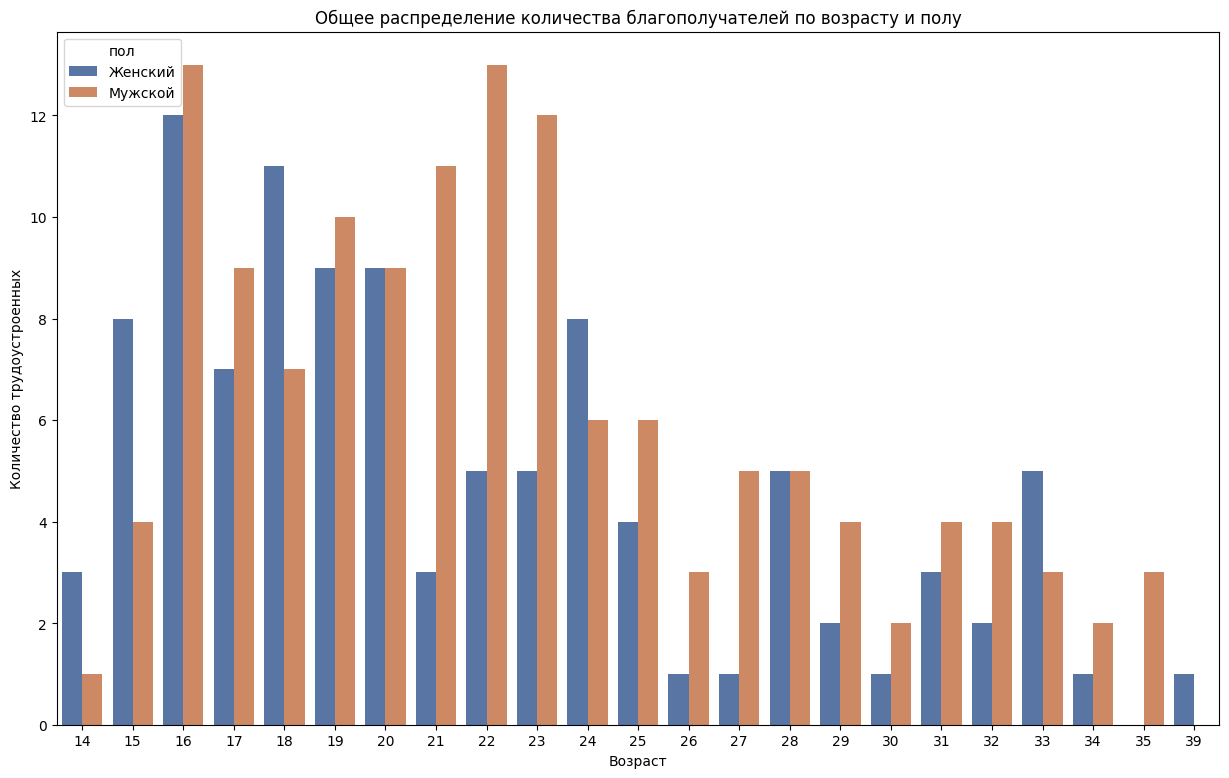

In [ ]:
plt.figure(figsize=(15,9))

sns.barplot (x="возраст", y="количество", data=genders_by_age, hue='пол')

plt.title('Общее распределение количества благополучателей по возрасту и полу')

plt.ylabel('Количество трудоустроенных')

plt.xlabel('Возраст')

plt.show()

**По графику видны пиковые значения у мужчин 16 и 22 лет. Интересно отметить что женщины до 20 лет идут прмерно в одном возрасте с мужчинами (опережая их в раннем возрасте), а в 18 даже опережают, а в период с 21 по 23 года мужчины получают наибольший перевес.**
**Просматривается тенденция к тому что женщины в более раннем возрасте обращаются за помощью в фонд, в то время как мужчины приходят к этому уже в более позднем возрасте.**
**Общая тенденция графика по возрасту что в основном это люди до 25 лет.**

## **2.5 Итоги общего обзора данных**

<a name="first"></a>

**1. 91 день уходит у среднего кандидата на трудоустройство. Наиболее долгий процесс устройства на открытый рынок без сопровождения и на внутренние площадки.**

**2. Структура по происхождению говорит о том, что адаптированная программа является лишь дополнением к инвалидности. Большинство кандидатов с сиротским опытом не имеют инвалидности и не учатся на адаптированных программах образования.**

**3. Кандидатов мужчин в фонде больше, женщины обращаются в фонд в более раннем возрасте.**


# **ЧАСТЬ 3 ИЗУЧЕНИЕ ОТРАБОТАВШИХ БОЛЕЕ 1 МЕСЯЦА**

<a name="more"></a>

## 3.1 Отработавшие более 1 месяца в разрезе гендера

<a name="gend"></a>

In [ ]:
#создаём таблицы для построения графиков

more_one_month = successful_employees.query('больше_месяца_работы == True')

more_one_month['id_кандидата'].count()

209

In [ ]:
more_one_gender = more_one_month.groupby(['пол']).agg({'id_кандидата':'count'}).reset_index()

more_one_gender.columns = ['пол','количество_отработавших']

more_one_gender = more_one_gender.sort_values(by='количество_отработавших', ascending = False)

In [ ]:
#строим график

fig = go.Figure(data=[go.Pie(labels= more_one_gender['пол'],
                             values=more_one_gender['количество_отработавших']),
                    ])


fig.update_layout(title='Процент благополучателей отработавших более одного месяца в разбивке по гендеру',
                  annotations=[dict(x=1.1,
                                    y=1.05,
                                    text='Гендер',
                                    showarrow=False)])


fig.show()

**Соотношение количества отработавших более одного месяца в абсолюных числах почти на 20% больше у мужчин, проверим как это будет смотреться в относительных величинах.**


In [ ]:
double_gender = more_one_gender.merge(genders, on='пол')

double_gender['процент'] = round(double_gender['количество_отработавших']/double_gender['количество'],2)* 100

double_gender

,пол,количество_отработавших,количество,процент
0,Мужской,124,136,91.0
1,Женский,85,106,80.0


**Относительные величины показывают что процент трудоустроенных мужчин от их количества на 11% чем процент трудоустроенных женщин**

## 3.2 Отработавшие более 1 месяца в разрезе возраста

<a name="age"></a>

**Теперь посмотрим на кандидатов отработавших более 1 месяца в разрезе возраста.**

In [ ]:
full_age = successful_employees.groupby(['возраст']).agg({'id_кандидата':'nunique'}).reset_index()

full_age.columns = ['возраст','количество']

In [ ]:
more_one_age = more_one_month.groupby(['возраст']).agg({'id_кандидата':'count'}).reset_index()

more_one_age.columns = ['возраст','количество_отработавших']

more_one_age = more_one_age.sort_values(by='количество_отработавших', ascending = False)

In [ ]:
double_age = full_age.merge(more_one_age, on= ['возраст'], how='left')

double_age['процент'] = round(double_age['количество_отработавших']/double_age['количество'],2)* 100

**Разделим кандидатов на возрастные группы для наглядности**

In [ ]:
def categorize_age (age):
    if age < 18:
        return 'до 18'
    if age >= 18 and age <= 22:
        return '18-22'
    if age >= 22 and  age <= 25:
        return '23-25'
    if age >= 26 and  age <= 30:
        return '26-30'
    if age >31:
        return '>31'

In [ ]:
double_age['возраст_категория'] = double_age['возраст'].apply(categorize_age)# применение функции методом apply()

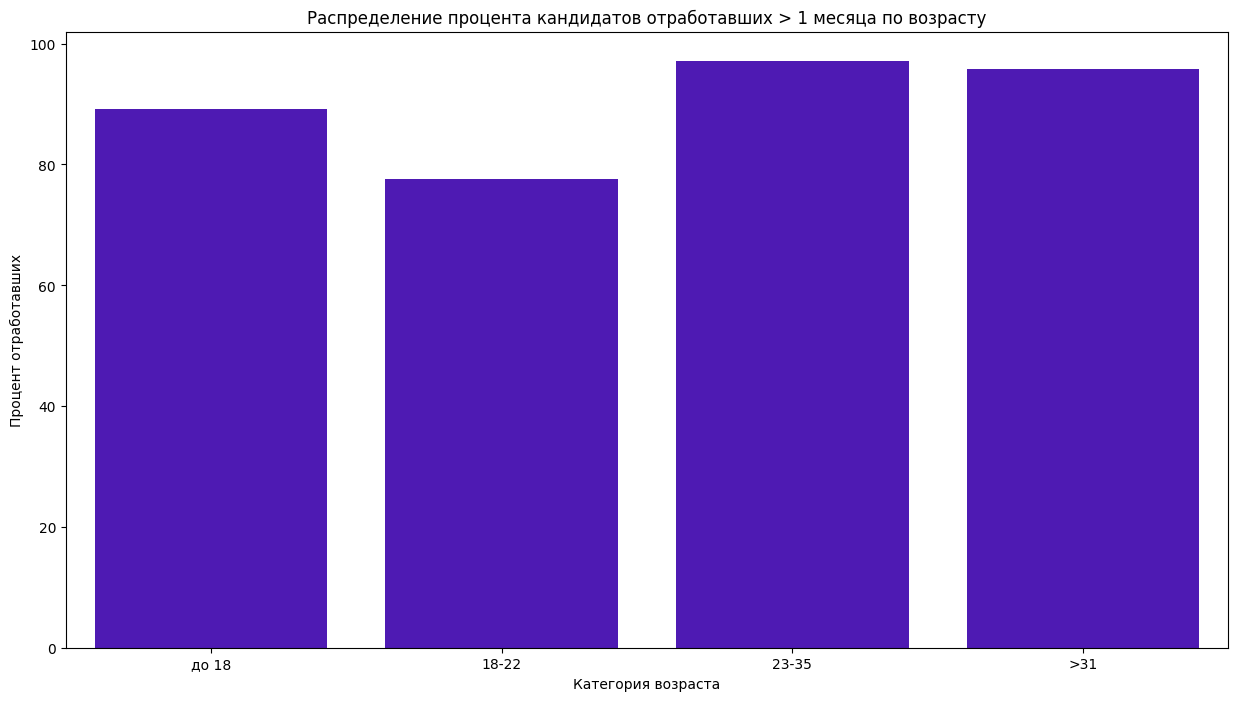

In [ ]:
plt.figure(figsize=(15,8))

sns.barplot (x="возраст_категория", y="процент", data=double_age, color='#4600cd', ci=None)

plt.title('Распределение процента кандидатов отработавших > 1 месяца по возрасту')

plt.ylabel('Процент отработавших')

plt.xlabel('Категория возраста')

plt.show()

**График говорит о том что более юным кандидатам (особенно категории 18-22)адаптация даётся сложнее чем более возрастным кандидатам. Предположительно что более зрелые кандидаты уже получили опыт работы и имеют серьёзный подход к трудоустройству**

## 3.3 Отработавшие более 1 месяца в разрезе типа трудоустройства

<a name="type"></a>

**Теперь проверим как отработавшие более одного месяца распределяются по типу трудоустройства**

In [ ]:
full_type = successful_employees.groupby(['тип_трудоустройства']).agg({'id_кандидата':'nunique'}).reset_index()

full_type.columns = ['тип_трудоустройства','количество']

In [ ]:
more_one_type = more_one_month.groupby('тип_трудоустройства').agg({'id_кандидата':'count'}).reset_index()

more_one_type.columns = ['тип_трудоустройства','количество_отработавших']

more_one_type = more_one_type.sort_values(by='количество_отработавших', ascending = False)


In [ ]:
double_type = full_type.merge(more_one_type, on= ['тип_трудоустройства'])

double_type['процент'] = round(double_type['количество_отработавших']/double_type['количество'],2)* 100

double_type = double_type.query('тип_трудоустройства != "Неизвестно"')

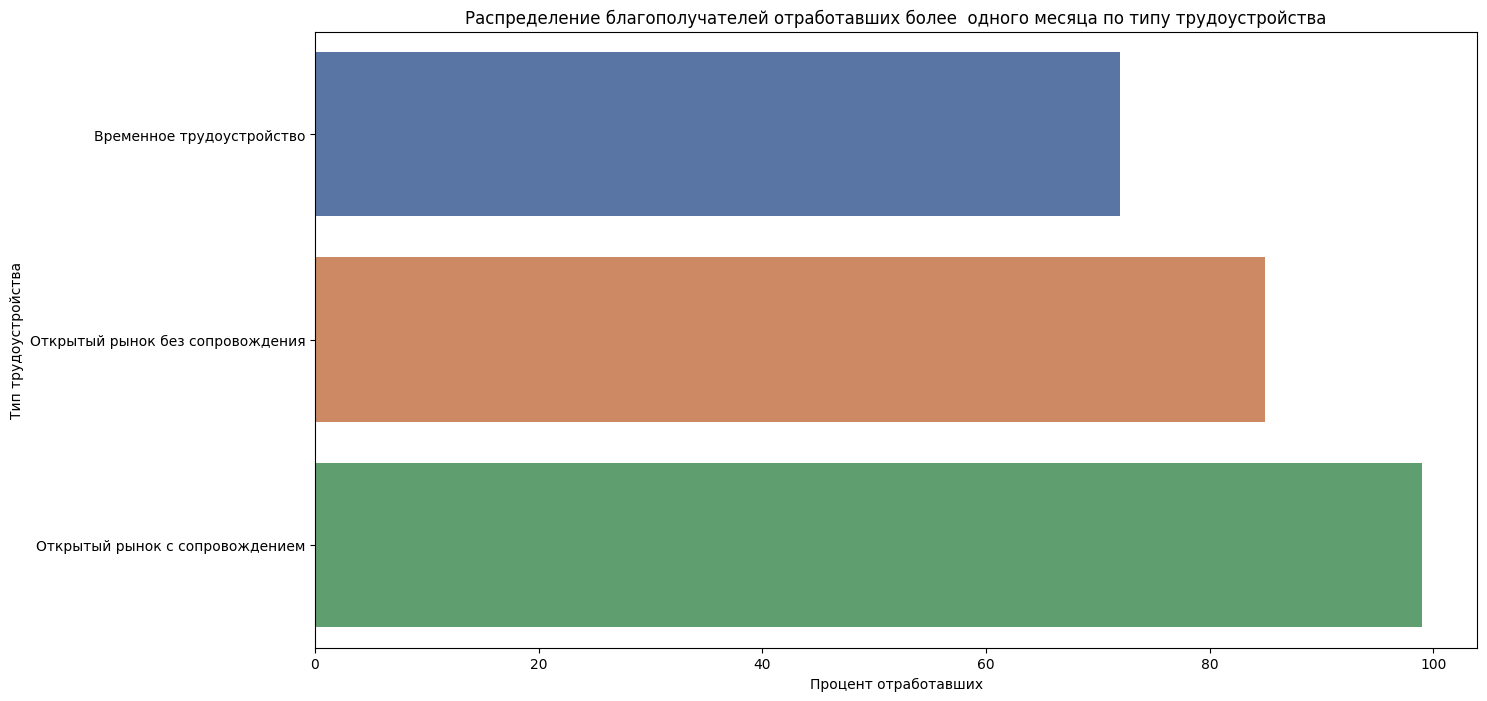

In [ ]:
plt.figure(figsize=(15,8))

sns.barplot (x='процент', y='тип_трудоустройства', data=double_type)

plt.title('Распределение благополучателей отработавших более  одного месяца по типу трудоустройства')

plt.ylabel('Тип трудоустройства')

plt.xlabel('Процент отработавших')

plt.show()

**График показывает, что большинство увольнений до 1 месяца произошли на временном трудоустройстве, что и так предпологается в таких случаях (в некоторых время уже заранее оговорено менее месяца)**

## 3.4 Отработавшие более 1 месяца в разрезе типа опыта работы

<a name="job"></a>

In [ ]:
full_work = successful_employees.groupby(['тип_опыта_работы']).agg({'id_кандидата':'nunique'}).reset_index()

full_work.columns = ['тип_опыта_работы','количество']

In [ ]:
more_one_work = more_one_month.groupby('тип_опыта_работы').agg({'id_кандидата':'count'}).reset_index()

more_one_work.columns = ['тип_опыта_работы','количество_отработавших']

more_one_work = more_one_work.sort_values(by='количество_отработавших', ascending = False)

In [ ]:
double_work = full_work.merge(more_one_work, on= ['тип_опыта_работы'])

double_work['процент'] = round(double_work['количество_отработавших']/double_work['количество'],2)* 100

double_work = double_work.query('тип_опыта_работы != "Неизвестно"')

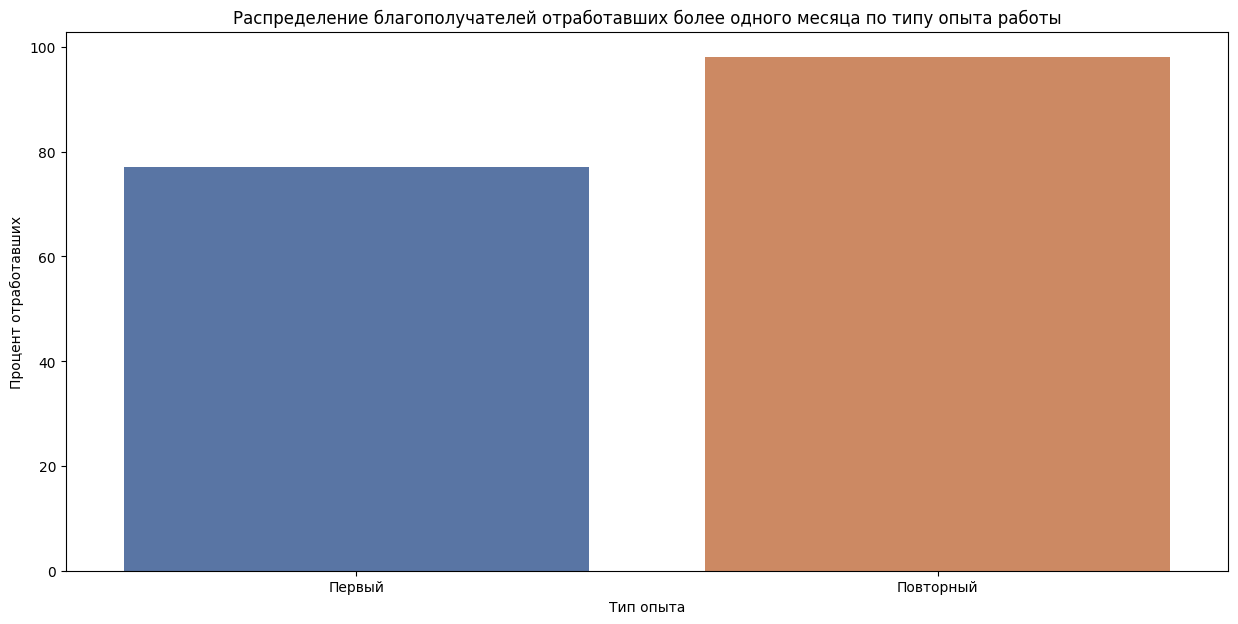

In [ ]:
plt.figure(figsize=(15,7))

sns.barplot (x='тип_опыта_работы', y='процент', data=double_work)

plt.title('Распределение благополучателей отработавших более одного месяца по типу опыта работы')

plt.ylabel('Процент отработавших')

plt.xlabel('Тип опыта')

plt.show()

**График иллюстрирует, что, дествительно, кандидаты получающие повторный опыт работы в 98% случаях отрабатывают на новом месте более 1 месяца, значит система первичного опыта, в том числе временного трудоустройства на внутренние площадки, даёт результат**

## **3.5 Итоги изучения отработавших более 1 месяца**

<a name="second"></a>

**1. Кандидаты-мужчины отрабатывают более 1 месяца на 11% чаще чем кандидаты-женщины.**

**2. Кандидаты в возрасте от 23 лет отрабатывают более 1 месяца чаще чем категории младше**

**3. Наибольший процент отработавших более 1 месяца кандидатов — это люди с сопровождаемым трудоустройством на открытом рынке, а люди с временным трудоустройством имеют наименьший.**

**4. Кандидаты с повторным опытом работы отрабатывают более 1 месяца чаще чем кандидаты с первичным опытом**


## **ЧАСТЬ 4 ИССЛЕДОВАНИЕ ТРУДОУСТРОЙСТВ В РАЗРЕЗЕ РАБОТЫ ПРОВАЙДЕРОВ**

<a name="razrez"></a>



## 4.1 Общие трудоустройства провайдеров

<a name="types"></a>

**Для начала проверим в каких регионах присутствуют и какое количество человек устроили провайдеры**

In [ ]:
providers = successful_employees.groupby(['провайдер_код', 'регион_код']).agg({'id_кандидата':'nunique'}).reset_index()

providers.columns = ['провайдер', 'регион', 'количество_устроенных' ]

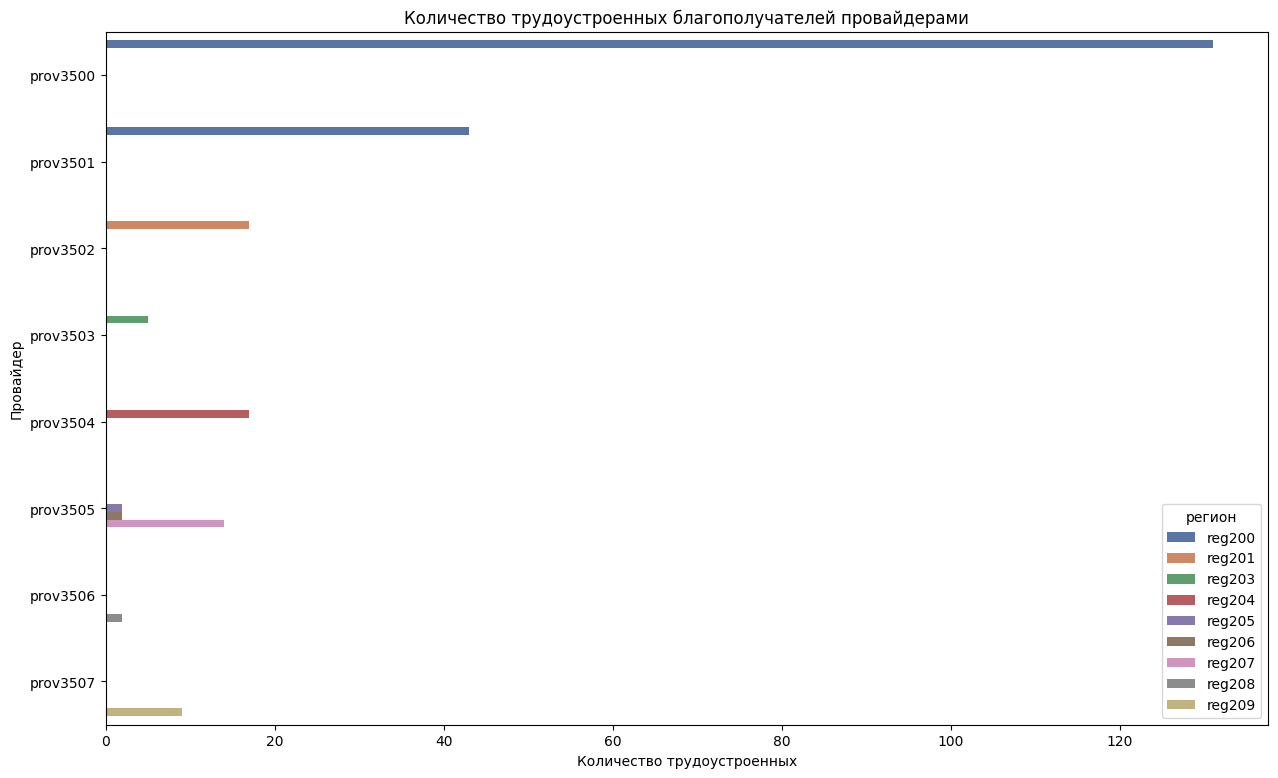

In [ ]:
plt.figure(figsize=(15,9))

sns.barplot (x="количество_устроенных", y="провайдер", data=providers, hue = 'регион')

plt.title('Количество трудоустроенных благополучателей провайдерами')

plt.ylabel('Провайдер')

plt.xlabel('Количество трудоустроенных')

plt.show()

**График показывает что наибльшее количество трудоустройств у провайдеров 3500 и 3501 из одного 200 региона. Провайдеры из других регионов устраивают гораздо реже.**

## 4.2 Количество трудоустроенных провайдерами кандидатов по типу трудоустройства по типу опыта работы

<a name="types"></a>

In [ ]:
providers_total = successful_employees.groupby(['провайдер_код']).agg({'id_кандидата':'nunique'}).reset_index()

providers_total.columns = ['провайдер', 'количество']

In [ ]:
providers_by_type = successful_employees.groupby(['провайдер_код', 'тип_опыта_работы']).agg({'id_кандидата':'nunique'}).reset_index()

providers_by_type.columns = ['провайдер', 'тип_опыта_работы', 'количество_устроенных']

In [ ]:
double_prov = providers_total.merge(providers_by_type, on= ['провайдер'])

double_prov['процент'] = round(double_prov['количество_устроенных']/double_prov['количество'],2)* 100

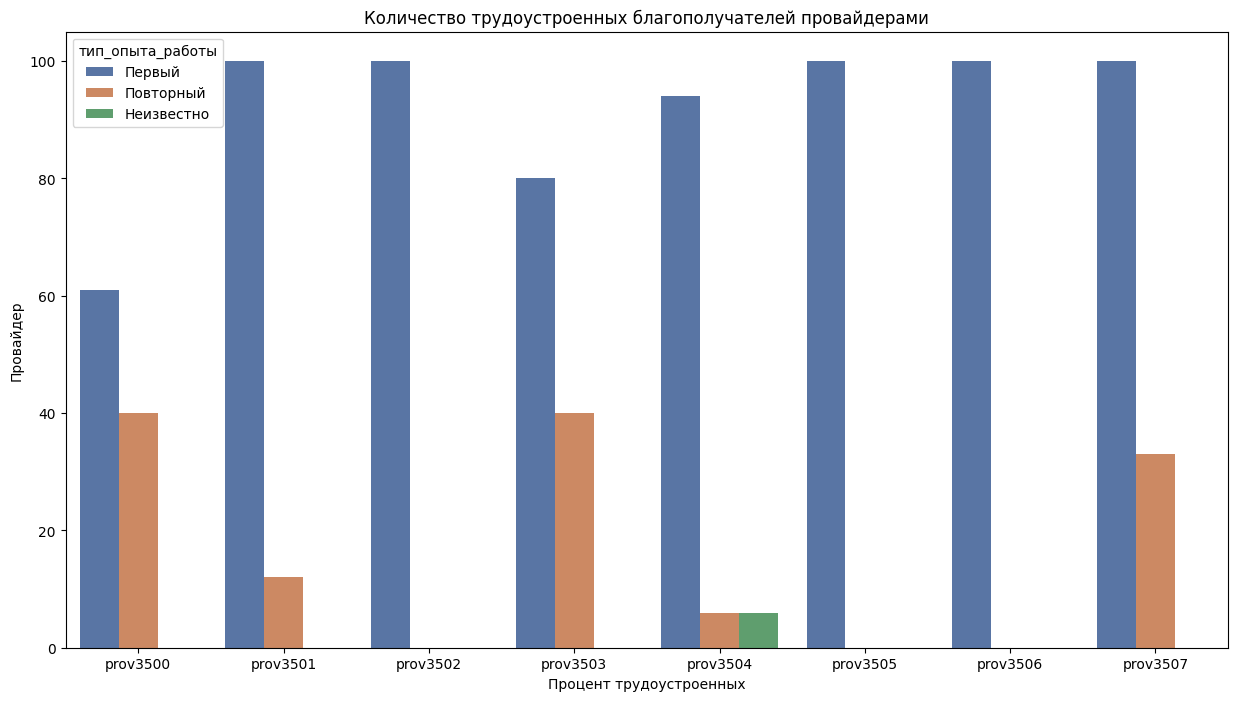

In [ ]:
plt.figure(figsize=(15,8))

sns.barplot (x="провайдер", y="процент", data=double_prov, hue = 'тип_опыта_работы')

plt.title('Количество трудоустроенных благополучателей провайдерами')

plt.ylabel('Провайдер')

plt.xlabel('Процент трудоустроенных')

plt.show()

**График показывает что провайдеры 3500, 3503 являются главными амбассадорами повторного трудоустройства. Учитывая объём трудоустройств в 3500 провайдере, можно утверждать что совершает большую часть повторных трудоустройств**

## 4.3 Особенности работы крупнейших провайдеров

<a name="espesial"></a>

**Проверим особенности трудоустройства двух крупнейших провайдеров.**

In [ ]:
providers_by_space = successful_employees.groupby(['провайдер_код', 'тип_трудоустройства']).agg({'id_кандидата':'nunique'}).reset_index()

providers_by_space.columns = ['провайдер', 'тип_трудоустройства', 'количество_кандидатов']

In [ ]:
merged_prov = providers_total.merge(providers_by_space, on= ['провайдер'])

merged_prov['процент'] = round(merged_prov['количество_кандидатов']/merged_prov['количество'],2)* 100

merged_prov = merged_prov.query('провайдер == ["prov3500", "prov3501"]')

merged_prov

,провайдер,количество,тип_трудоустройства,количество_кандидатов,процент
0,prov3500,131,Временное трудоустройство,51,39.0
1,prov3500,131,Открытый рынок без сопровождения,35,27.0
2,prov3500,131,Открытый рынок с сопровождением,47,36.0
3,prov3501,43,Временное трудоустройство,33,77.0
4,prov3501,43,Открытый рынок с сопровождением,13,30.0


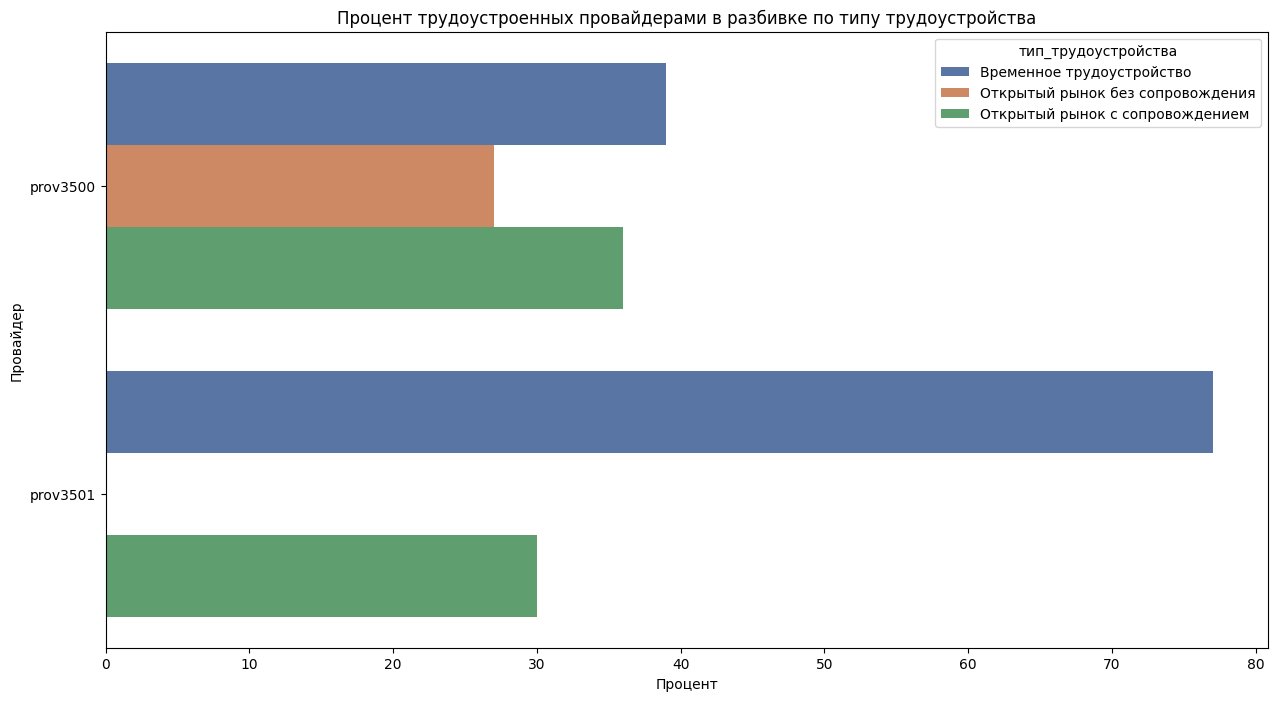

In [ ]:
#строим график

plt.figure(figsize=(15,8))

sns.barplot (x="процент", y="провайдер", data=merged_prov, hue = 'тип_трудоустройства')

plt.title('Процент трудоустроенных провайдерами в разбивке по типу трудоустройства')

plt.ylabel('Провайдер')

plt.xlabel('Процент')

plt.show()

**График показывает что в 200 регионе ведут деятельность 2 разных по своей деятельности провайдера. Провайдер 3500 сосредоточен на трудоустройстве кандидатов на открытый рынок без сопровождения и не устраиваент на внутренние площадки. В свою очередь провайдер 3501 является амбассадором временного трудоустройства (зачастую на внутренние площадки).**

## 4.4 Динамика трудоустройств в разбивке по провайдерам


<a name="dynamic"></a>



**Проверим как провайдеры трудоустраивали благополучателей в зависимости от месяца**

In [ ]:
time_success = successful_employees[['id_кандидата','начало_трудоустройства','провайдер_код']].copy ()

time_success['месяц'] = time_success['начало_трудоустройства'].dt.to_period('M')

empl_cnt = time_success.groupby(['месяц', 'провайдер_код']).agg({'id_кандидата':'nunique'}).reset_index()

empl_cnt.columns = ['месяц', 'провайдер_код', 'количеcтво_сотрудников']

empl_cnt['месяц'] = empl_cnt['месяц'].astype(str)

Text(0, 0.5, 'Количество трудоустроенных')

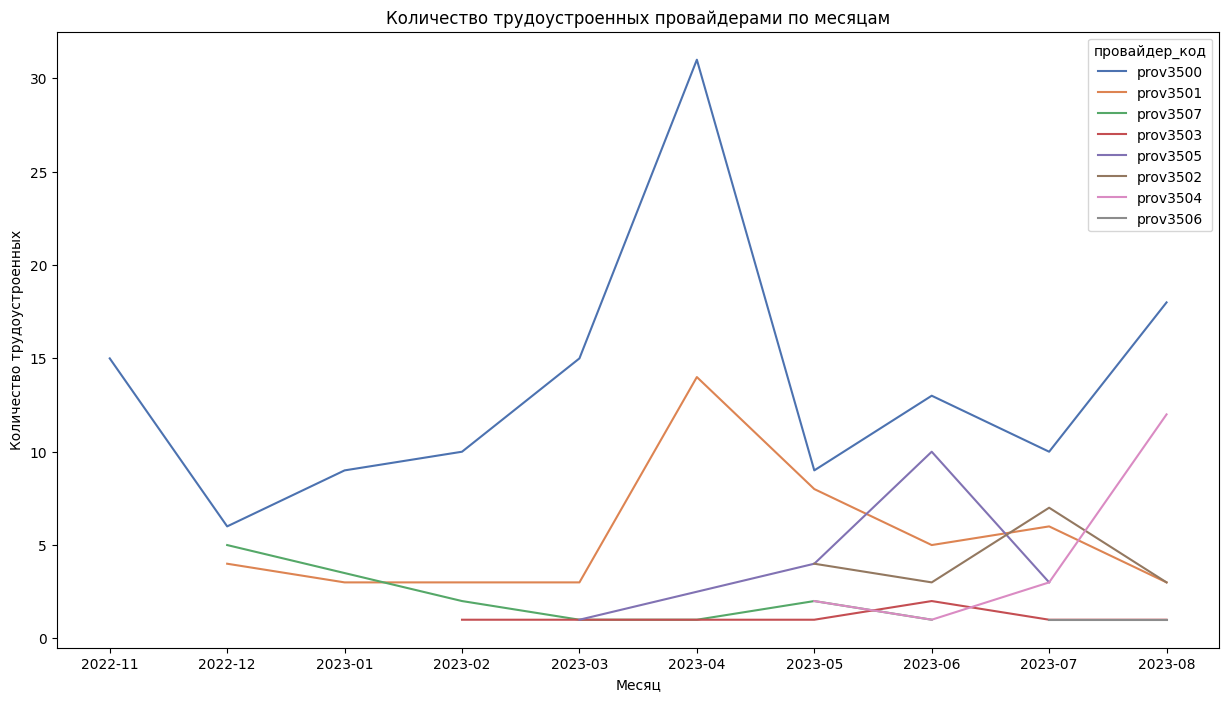

In [ ]:
plt.figure(figsize=(15,8))

sns.lineplot(x="месяц", y="количеcтво_сотрудников", data=empl_cnt, hue='провайдер_код')

plt.title('Количество трудоустроенных провайдерами по месяцам')

plt.xlabel("Месяц")

plt.ylabel("Количество трудоустроенных")

**Общий тренд динамики - значения трудоустройств осенью-зимой ниже чем весной-летом. Это может быть вызвано новогодними каникулами, холодным временем года и праздничными днями февраля - начала марта**

**Ожидаемо, провайдеры 3500 и 3501 имеют больше трудоустройств до апреля 23 года (здесь находится пик для этих провайдеров). После пика у провайдера 3501 просматривается значительный спад. Следующий пик в июне и здесь своего пика достигает проавайдер 3505. Также примечательно что в августе резкий приток трудоустройств случился у провайдера 3504**

## **4.5 Итоги исследования работы провайдеров**

<a name="provfin"></a>

1. Присутствуют 2 крупнейших провайдера из одного региона

2. Провайдер 3500 специализируется на повторных трудоустройствах кандидатов, а также на трудоустройствах на открытый рынок без сопровождения.

3. Провайдер 3501 специализируется на временной занятости на внутренние площадки и не допускает кандидатов к работе без сопровождения.

4. Просматривается низкая активность провайдеров в начале года. В апреле происходит скачок деятельности крупнейших провайдеров, после чего летом виден значительный спад.


# **ЧАСТЬ 5 ИТОГОВЫЕ ВЫВОДЫ ИССЛЕДОВАНИЯ**

<a name="final"></a>

1. **В среднем фонду для трудоустройства требуется 91 день, на открытый рынок устроить кандидата сложнее чем на внутреннюю площадку. Так как приоритетом является устройство на внешние площадки – это занимает больше времени, на внутреннюю устраивают в случае невозможности устроить на открытый рынок.**

Для фонда идеальным раскладом станет ситуация, когда все кандидаты будут устраиваться быстро и на открытый рынок без сопровождения. В таком случе все кандидаты могли бы устраиваться самостоятельно и деятельность фонда была бы не нужна.

Для поиска работы необходима система оценки когнитивных способностей, профориентации и оценки талантов, с помощью которой фонд смог бы оценивать потенциал кандидата и сразу же направлять его на подходящую вакансию.


2. **Чаще всего встречаются благополучатели только с инвалидность или сиротским опытом. А адаптированная программа зачастую только сочетается со статусом инвалидности.**

3. **Количество мужчин-благополучателей за период больше. Женщины в более раннем возрасте (16-18) прибегают к помощи фонда. Мужчины прибегают к помощи в более взрослом возрасте (21-23).**

Предположительно, это связано с тем, что женщины в более раннем становятся менее инфантильными.

В данном аспекте необходимо привлекать в фонд более юных кандидатов-мужчин, поскольку чем раньше ребенок осознает, что ему необходима помощь в поиске и адаптации на рабочем месте - тем ему будет легче.

Предлагается таргетировать рекламные кампании на юношей 18-21 года и активней среди них распространять информацию (интернаты, детские дома и т.д.)

4.  **Кандидаты-мужчины отрабатывают на 11% чаще чем кандидаты-женщины.**

Отдельная тема для анализа внутри фонда: с чем связан меньший процент отработки более одного месяца среди кандидатов-женщин.

5. **Данные говорят более возрастные категории, как кандидаты с повторным опытом работы чаще отрабатывают более 1 месяца**

Рекомендуется более молодых кандидатов проводить через подготовительный этап на временном трудоустройстве.

6. **Наибольший процент отработавших 1 месяц кандидатов — это люди с сопровождаемым трудоустройством на открытом рынке, а люди с временным трудоустройством имеют наименьший**

Это говорит о том, что временное трудоустройство зачастую уже оговорено на срок менее месяца. Программа сопровождения трудоустройства работает и люди отрабатывают дольше чем без него.

7. **У фонда присутствует два наиболее результативных провайдера 3500 и 3501 из одного региона 200. По динамике в лидерах всегда 3500 провайдер, местами происходят пики и у других провайдеров. У провайдера 3501 с апреля 23 года начался спад результативности**

**Провайдер 3500 специализируется на повторных трудоустройствах кандидатов, а также на трудоустройствах на открытый рынок без сопровождения.**

**Провайдер 3501 специализируется на временной занятости на внутренние площадки и не допускает кандидатов к работе без сопровождения.**

Так как у провайдеров из одного региона есть такая выраженная специализация - рекомендуется наладить распределение кандидатов между провайдерами и после оценки кандидата по возрасту и способностям направлять его по временному трудоустройству в провайдер 3501, а более подготовленных кандидатов к провайдеру 3500 для сопровождения на открытом рынке.




